# Quick visualization of netCDF ERA 5 Climate data file with Python 3

- [xarray python package](http://xarray.pydata.org/en/stable/)

In [10]:
import xarray as xr
%matplotlib inline

In [11]:
dset = xr.open_dataset("~/Downloads/ERA5_REANALYSIS_precipitation_200306.nc")
print(dset)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2003-06-01
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-05-31 19:05:13 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...


In [13]:
print(dset['tp'])

<xarray.DataArray 'tp' (time: 1, latitude: 721, longitude: 1440)>
[1038240 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2003-06-01
Attributes:
    units:      m
    long_name:  Total precipitation


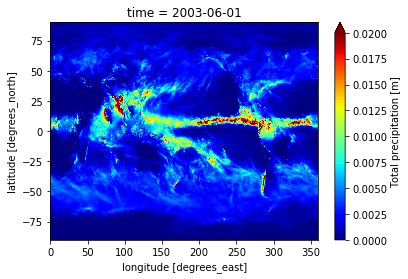

In [25]:
dset['tp'].plot(cmap='jet', vmax=0.02)

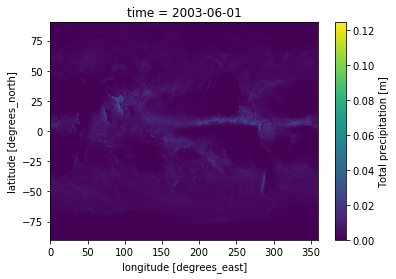

In [26]:
dset['tp'].plot()

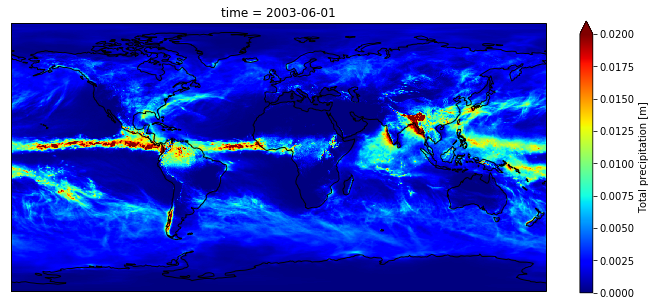

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

dset['tp'].plot(ax=ax, vmax=0.02, cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [47]:
dset = xr.open_dataset("~/Downloads/ERA5_REANALYSIS_air_temperature_200306.nc")
print(dset)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 1)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2003-06-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-06-01 14:27:58 GMT by grib_to_netcdf-2.10.0: /opt/ecmw...


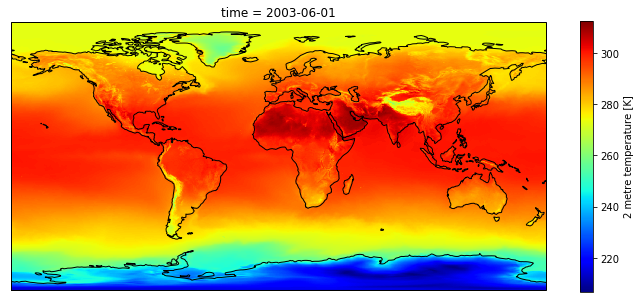

In [49]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

dset['t2m'].plot(ax=ax,  cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

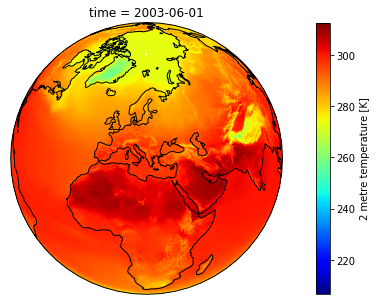

In [51]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection = ccrs.Orthographic(central_longitude=20, central_latitude=40))

dset['t2m'].plot(ax=ax,  cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

# Quick visualization of CMIP5 Climate data with Python 3

## Precipitation

In [72]:
dset = xr.open_dataset("~/Downloads/pr_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc")
print(dset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 1872)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes:
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    branch_time:            255135.0
    contact:                Please send any request

In [73]:
print(dset.pr)

<xarray.DataArray 'pr' (time: 1872, lat: 96, lon: 144)>
[25878528 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             kg m-2 s-1
    original_name:     PRECT
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2011-06-01T05:45:35Z altered by CMOR: Converted type f...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...


In [74]:
dset.pr.data = dset.pr.data * 86.4
dset.pr.attrs['units'] = 'm day-1' 

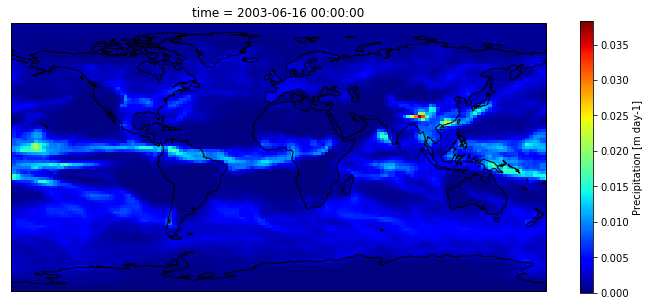

In [77]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

dset['pr'].sel(time='200306').plot(ax=ax, cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()

In [83]:
dset['pr'].sel(time=slice('200306', '200406', 12))

<xarray.DataArray 'pr' (time: 2, lat: 96, lon: 144)>
array([[[2.114823e-05, 2.114823e-05, ..., 2.114823e-05, 2.114823e-05],
        [3.787203e-05, 3.682408e-05, ..., 3.772908e-05, 3.680853e-05],
        ...,
        [7.738324e-04, 8.255294e-04, ..., 7.871171e-04, 8.004216e-04],
        [6.984189e-04, 6.986369e-04, ..., 6.984310e-04, 6.983504e-04]],

       [[1.847185e-04, 1.847185e-04, ..., 1.847185e-04, 1.847185e-04],
        [8.476275e-05, 8.299961e-05, ..., 9.207508e-05, 8.666257e-05],
        ...,
        [4.763984e-04, 4.645830e-04, ..., 5.200990e-04, 4.929897e-04],
        [5.676933e-04, 5.677207e-04, ..., 5.673288e-04, 5.674717e-04]]],
      dtype=float32)
Coordinates:
  * time     (time) object 2003-06-16 00:00:00 2004-06-16 00:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation


## Near-Surface Air Temperature

In [53]:
dset = xr.open_dataset("~/Downloads/tas_Amon_NorESM1-M_historical_r1i1p1_185001-200512.nc")
print(dset)

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 144, time: 1872)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes:
    institution:            Norwegian Climate Centre
    institute_id:           NCC
    experiment_id:          historical
    source:                 NorESM1-M 2011  atmosphere: CAM-Oslo (CAM4-Oslo-n...
    model_id:               NorESM1-M
    forcing:                GHG, SA, Oz, Sl, Vl, BC, OC
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    branch_time:            255135.0
    contact:            

In [61]:
dset.tas

<xarray.DataArray 'tas' (time: 1872, lat: 96, lon: 144)>
[25878528 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2005-12-16 12:00:00
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    original_name:     TREFHT
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2011-06-01T03:52:41Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

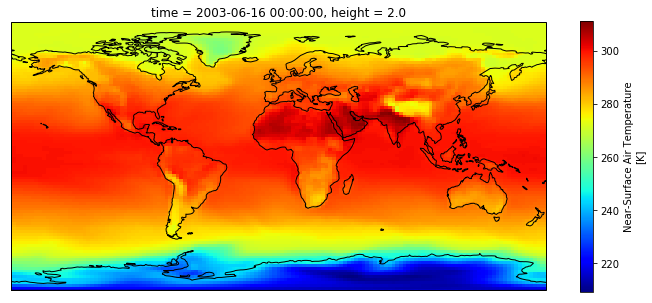

In [60]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[12,5])

# 111 means 1 row, 1 col and index 1
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=0))

dset['tas'].sel(time='200306').plot(ax=ax, cmap='jet',
                   transform=ccrs.PlateCarree())
ax.coastlines()

plt.show()